In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
file = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/life-expectancy-who/Life Expectancy Data.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/life-expectancy-who/Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
print(df.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [4]:
#Verificar valores Ausentes
valores_ausentes = df.isnull().sum()
print(valores_ausentes)

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [5]:
colunas_nulas =df.columns[df.isnull().any()]
print(colunas_nulas)

Index(['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B',
       ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP',
       'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [6]:
df.fillna(df[colunas_nulas].mean(), inplace = True)

In [7]:
df = df.rename(columns={'Country': 'pais',
                        'Year' : 'ano', 
                        'Status' : 'status', 
                        'Life expectancy ' : 'expectativa_vida', 
                        'Adult Mortality' : 'mortalidade_adulta',
                        'infant deaths' : 'mortaldade_infantil', 
                        'Alcohol': 'alcool', 
                        'percentage expenditure' : 'percentual_gastos', 
                        'Hepatitis B' : 'hepatite_b', 
                        'Measles ' : 'sarampo', 
                        ' BMI ' : 'imc', 
                        'under-five deaths ' : 'mortalidade_abaixo_5anos', 
                        'Polio' : 'poliomielite',
                        'Total expenditure' : 'gastos_totais',
                        'Diphtheria ' : 'difteria', 
                        ' HIV/AIDS' : 'hiv_aids', 
                        'GDP' : 'pib', 
                        'Population' : 'população',
                        ' thinness  1-19 years' : 'magreza_1a19anos', 
                        ' thinness 5-9 years' : 'magreza_5a9anos',
                        'Income composition of resources' : 'indice_desenvolvimento_humano', 
                        'Schooling' : 'anos_escolares'})
print(df.columns)

Index(['pais', 'ano', 'status', 'expectativa_vida', 'mortalidade_adulta',
       'mortaldade_infantil', 'alcool', 'percentual_gastos', 'hepatite_b',
       'sarampo', 'imc', 'mortalidade_abaixo_5anos', 'poliomielite',
       'gastos_totais', 'difteria', 'hiv_aids', 'pib', 'população',
       'magreza_1a19anos', 'magreza_5a9anos', 'indice_desenvolvimento_humano',
       'anos_escolares'],
      dtype='object')


In [8]:
# Remover espaços extras
df.columns = df.columns.str.strip()

In [9]:
df.describe()

,ano,expectativa_vida,mortalidade_adulta,mortaldade_infantil,alcool,percentual_gastos,hepatite_b,sarampo,imc,mortalidade_abaixo_5anos,poliomielite,gastos_totais,difteria,hiv_aids,pib,população,magreza_1a19anos,magreza_5a9anos,indice_desenvolvimento_humano,anos_escolares
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   pais                           2938 non-null   object 
 1   ano                            2938 non-null   int64  
 2   status                         2938 non-null   object 
 3   expectativa_vida               2938 non-null   float64
 4   mortalidade_adulta             2938 non-null   float64
 5   mortaldade_infantil            2938 non-null   int64  
 6   alcool                         2938 non-null   float64
 7   percentual_gastos              2938 non-null   float64
 8   hepatite_b                     2938 non-null   float64
 9   sarampo                        2938 non-null   int64  
 10  imc                            2938 non-null   float64
 11  mortalidade_abaixo_5anos       2938 non-null   int64  
 12  poliomielite                   2938 non-null   f

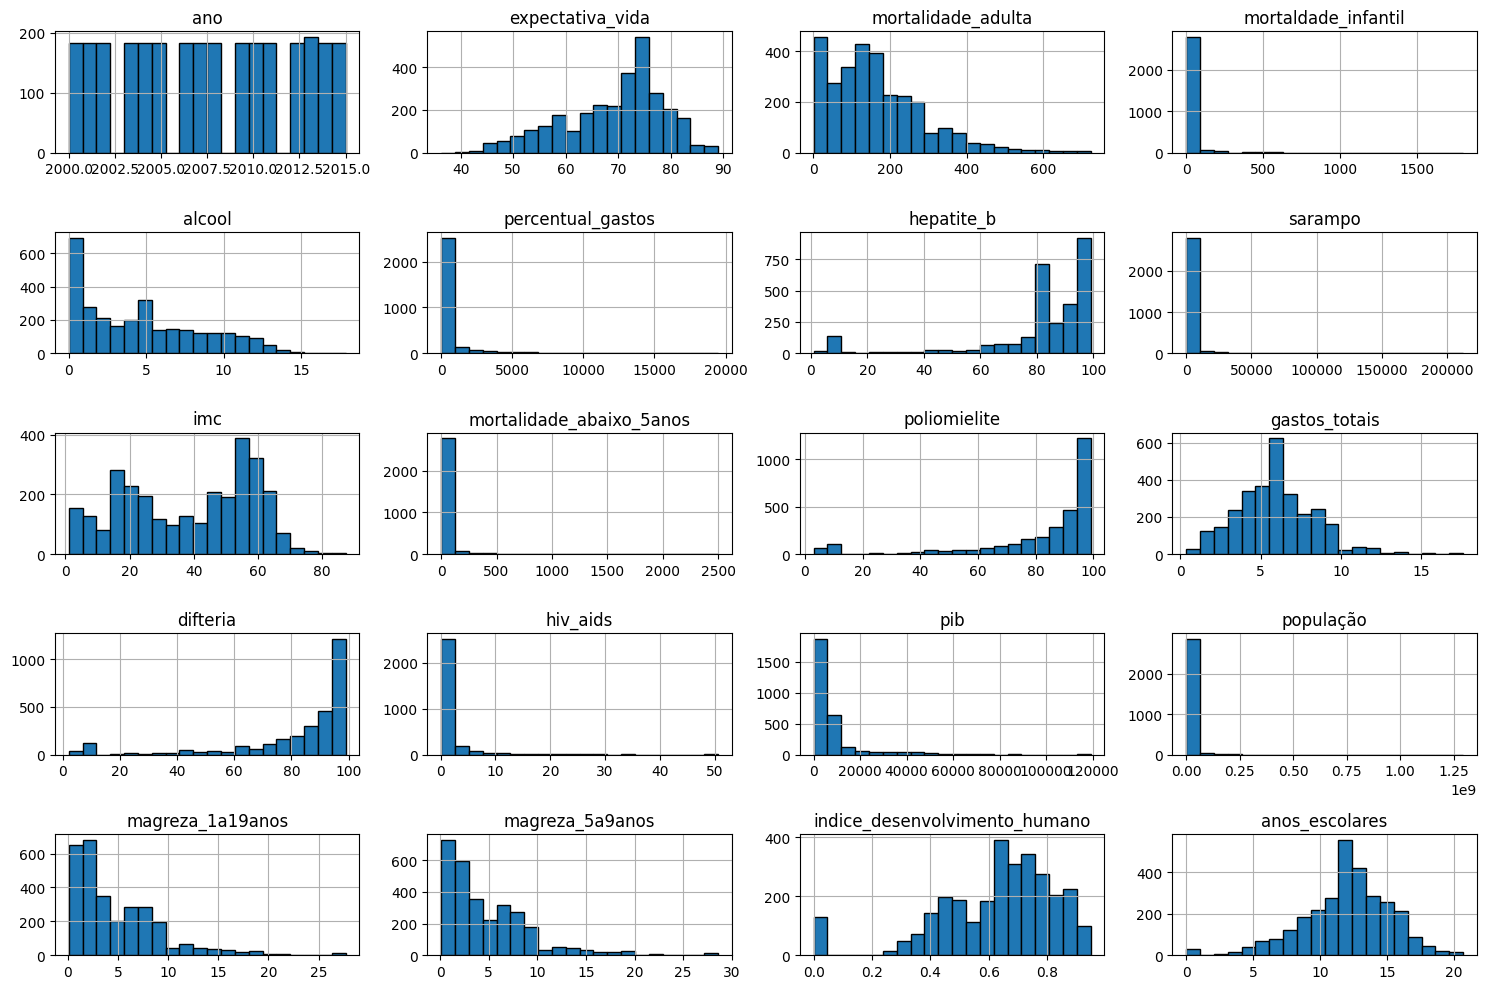

In [11]:
# Plote histogramas para todas as variáveis numéricas
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

### Distribuição da Expectativa de Vida ao Longo dos Anos

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


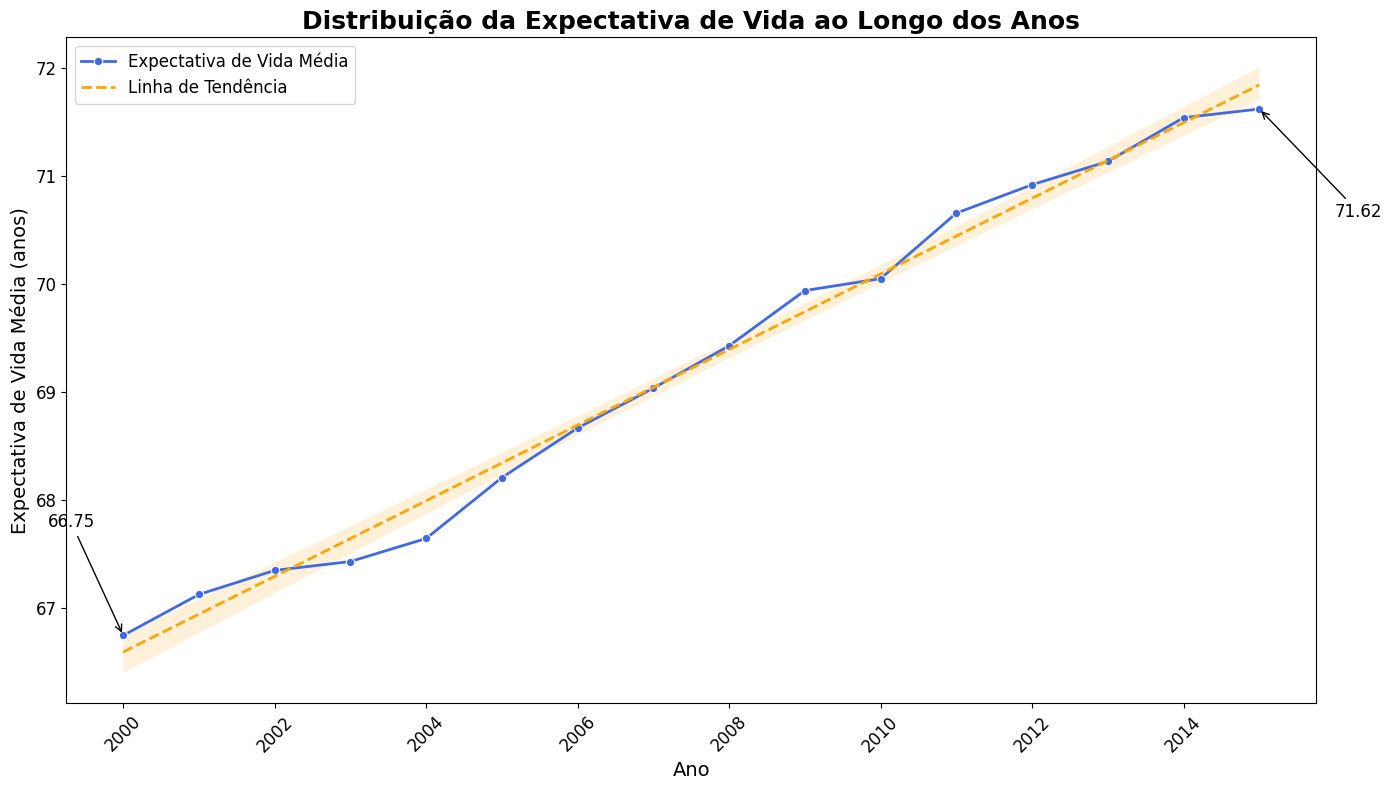

In [12]:
# Certifique-se de que os dados estão limpos (remover espaços extras, se necessário)
df.columns = df.columns.str.strip()

# Agrupar os dados por ano e calcular a média da expectativa de vida para cada ano
media_expectativa_vida_por_ano = df.groupby('ano')['expectativa_vida'].mean()

# Plotando a distribuição da expectativa de vida ao longo dos anos
plt.figure(figsize=(14, 8))  # Tamanho adequado para o gráfico

# Gráfico de linha com marcadores e paleta de cores
sns.lineplot(x=media_expectativa_vida_por_ano.index, 
             y=media_expectativa_vida_por_ano.values, 
             marker='o', 
             color='royalblue', 
             linewidth=2,  # Espessura da linha
             label='Expectativa de Vida Média')

# Adicionando uma linha de tendência (regressão) para mostrar a direção
sns.regplot(x=media_expectativa_vida_por_ano.index, 
            y=media_expectativa_vida_por_ano.values, 
            scatter=False, 
            color='orange', 
            line_kws={'linewidth': 2, 'linestyle': '--', 'color': 'orange'}, 
            label='Linha de Tendência')

# Adicionando título e rótulos
plt.title('Distribuição da Expectativa de Vida ao Longo dos Anos', fontsize=18, fontweight='bold')
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Expectativa de Vida Média (anos)', fontsize=14)

# Melhorar a exibição dos rótulos do eixo X e Y
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adicionar uma legenda
plt.legend(fontsize=12)

# Melhorar a visibilidade com anotações (exemplo no primeiro e último ponto)
plt.annotate(f'{media_expectativa_vida_por_ano.values[0]:.2f}', 
             xy=(media_expectativa_vida_por_ano.index[0], media_expectativa_vida_por_ano.values[0]), 
             xytext=(media_expectativa_vida_por_ano.index[0] - 1, media_expectativa_vida_por_ano.values[0] + 1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)

plt.annotate(f'{media_expectativa_vida_por_ano.values[-1]:.2f}', 
             xy=(media_expectativa_vida_por_ano.index[-1], media_expectativa_vida_por_ano.values[-1]), 
             xytext=(media_expectativa_vida_por_ano.index[-1] + 1, media_expectativa_vida_por_ano.values[-1] - 1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


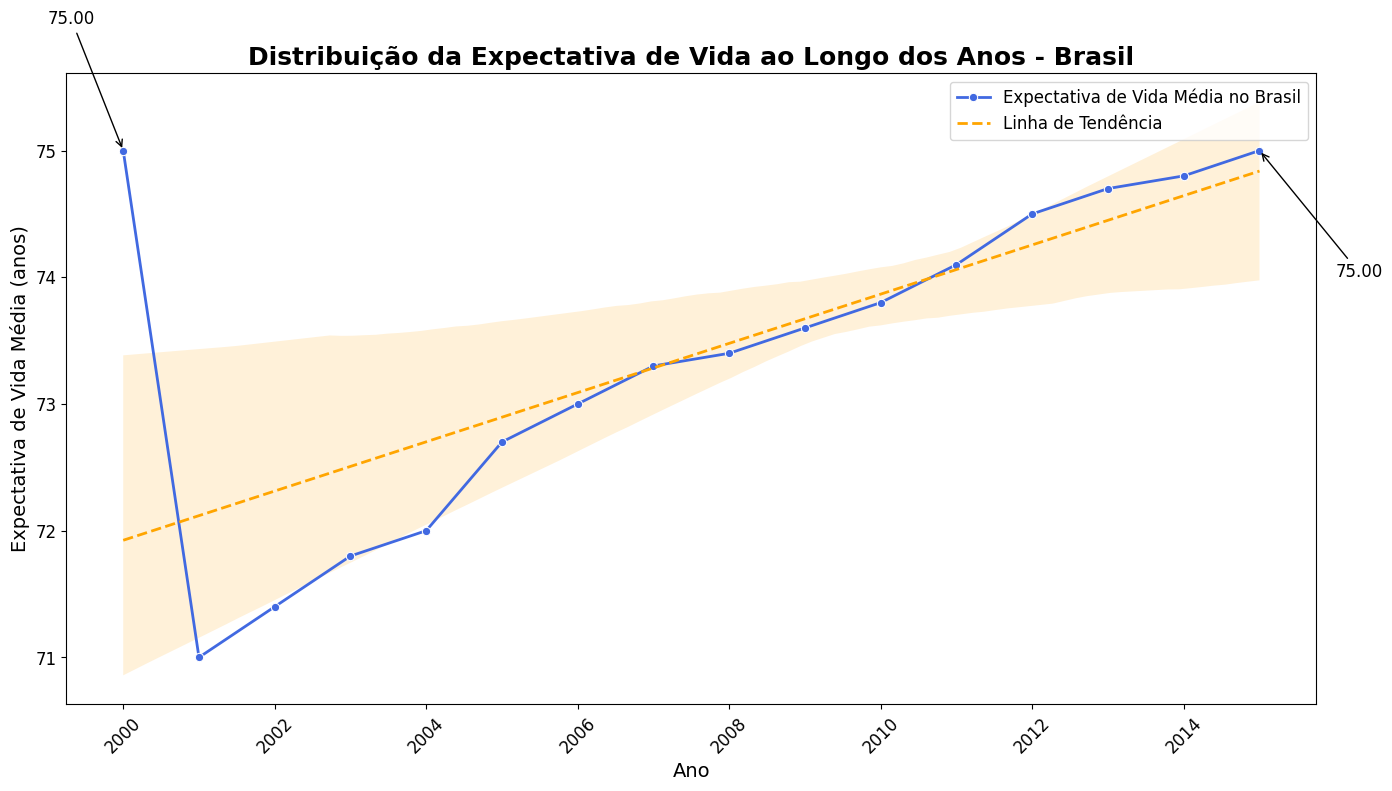

In [13]:
# Certifique-se de que os dados estão limpos (remover espaços extras, se necessário)
df.columns = df.columns.str.strip()

# Filtrar dados para o Brasil
df_brazil = df[df['pais'] == 'Brazil']

# Agrupar e calcular a média da expectativa de vida por ano para o Brasil
media_brazil = df_brazil.groupby('ano')['expectativa_vida'].mean()

# Plotando a distribuição da expectativa de vida ao longo dos anos para o Brasil
plt.figure(figsize=(14, 8))  # Tamanho adequado para o gráfico

# Gráfico de linha com marcadores e paleta de cores
sns.lineplot(x=media_brazil.index, 
             y=media_brazil.values, 
             marker='o', 
             color='royalblue', 
             linewidth=2,  # Espessura da linha
             label='Expectativa de Vida Média no Brasil')

# Adicionando uma linha de tendência (regressão) para mostrar a direção
sns.regplot(x=media_brazil.index, 
            y=media_brazil.values, 
            scatter=False, 
            color='orange', 
            line_kws={'linewidth': 2, 'linestyle': '--', 'color': 'orange'}, 
            label='Linha de Tendência')

# Adicionando título e rótulos
plt.title('Distribuição da Expectativa de Vida ao Longo dos Anos - Brasil', fontsize=18, fontweight='bold')
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Expectativa de Vida Média (anos)', fontsize=14)

# Melhorar a exibição dos rótulos do eixo X e Y
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adicionar uma legenda
plt.legend(fontsize=12)

# Melhorar a visibilidade com anotações (exemplo no primeiro e último ponto)
plt.annotate(f'{media_brazil.values[0]:.2f}', 
             xy=(media_brazil.index[0], media_brazil.values[0]), 
             xytext=(media_brazil.index[0] - 1, media_brazil.values[0] + 1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)

plt.annotate(f'{media_brazil.values[-1]:.2f}', 
             xy=(media_brazil.index[-1], media_brazil.values[-1]), 
             xytext=(media_brazil.index[-1] + 1, media_brazil.values[-1] - 1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()

### Correlação entre Mortalidade e Expectativa de Vida

Correlação entre Mortalidade Adulta e Expectativa de Vida: -0.70


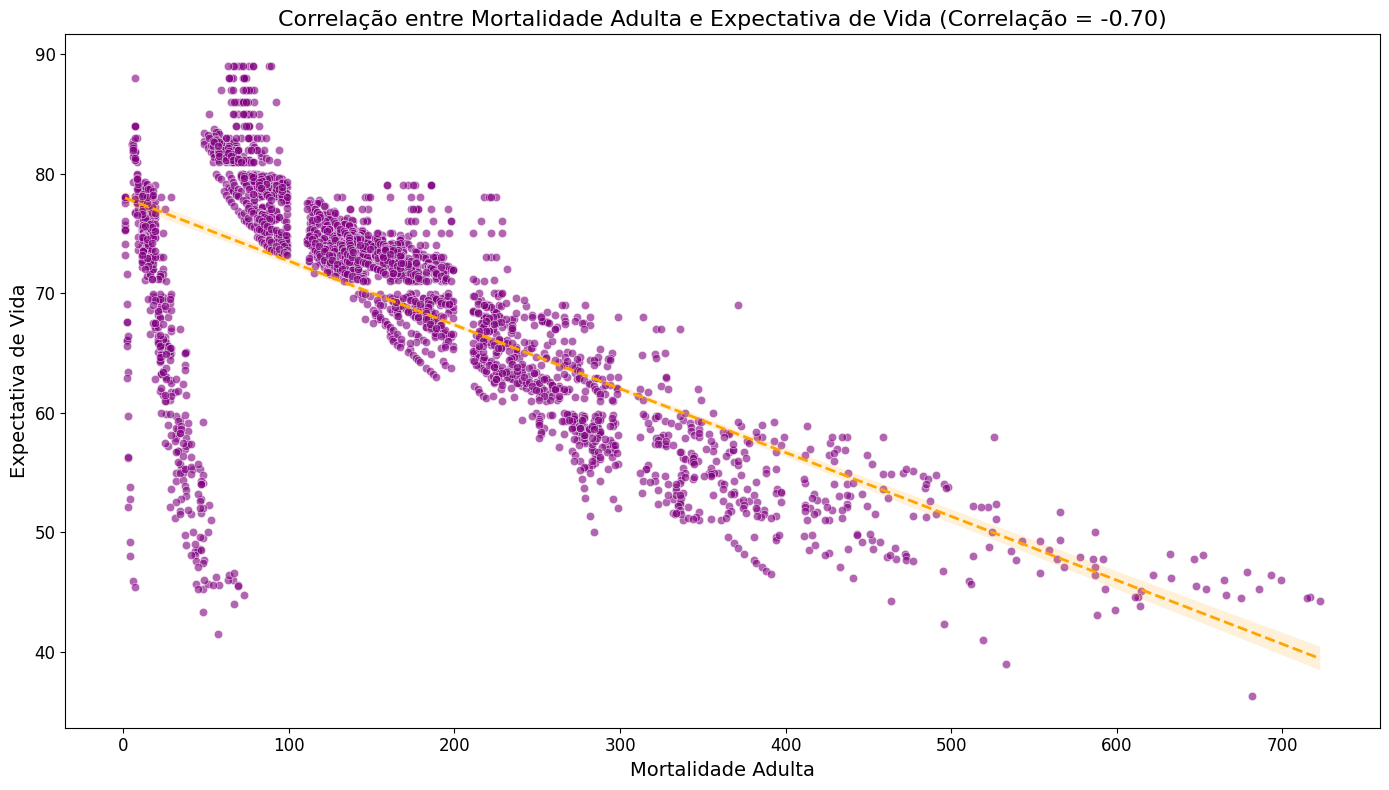

In [14]:
# Calcular a correlação entre Mortalidade Adulta e Expectativa de Vida
correlacao = df['mortalidade_adulta'].corr(df['expectativa_vida'])

# Exibir a correlação
print(f'Correlação entre Mortalidade Adulta e Expectativa de Vida: {correlacao:.2f}')

# Plotando o gráfico de dispersão (scatter plot)
plt.figure(figsize=(14, 8))

sns.scatterplot(x='mortalidade_adulta', y='expectativa_vida', data=df, color='purple', alpha=0.6)

# Adicionando uma linha de regressão
sns.regplot(x='mortalidade_adulta', y='expectativa_vida', data=df, scatter=False, color='orange', line_kws={'linewidth': 2, 'linestyle': '--'})

# Adicionar título e rótulos
plt.title(f'Correlação entre Mortalidade Adulta e Expectativa de Vida (Correlação = {correlacao:.2f})', fontsize=16)
plt.xlabel('Mortalidade Adulta', fontsize=14)
plt.ylabel('Expectativa de Vida', fontsize=14)

# Melhorar a exibição dos rótulos do eixo X e Y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Exibir o gráfico
plt.tight_layout()
plt.show()

### Correlação entre Diversos Fatores e Expectativa de Vida

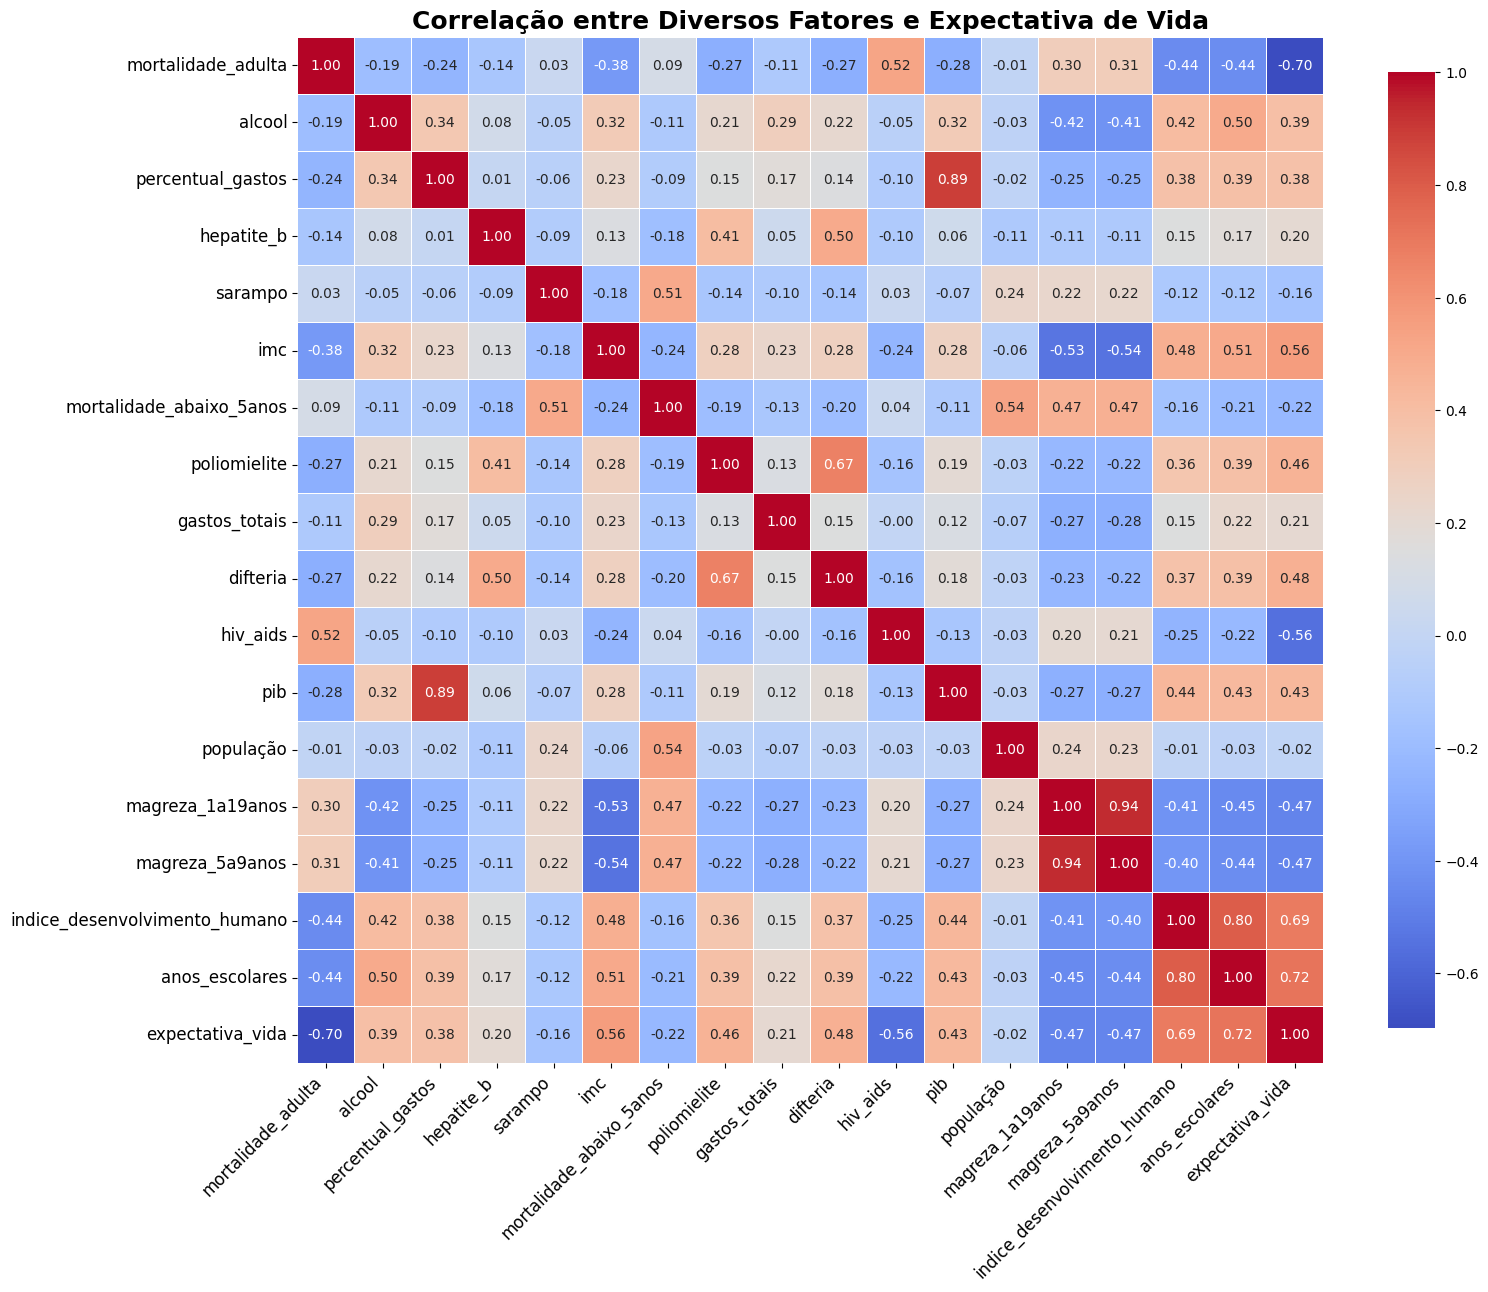

In [15]:
# Selecionar as variáveis que queremos analisar
fatores = ['mortalidade_adulta', 'alcool', 'percentual_gastos', 'hepatite_b', 'sarampo',
           'imc', 'mortalidade_abaixo_5anos', 'poliomielite', 'gastos_totais', 'difteria', 'hiv_aids',
           'pib', 'população', 'magreza_1a19anos', 'magreza_5a9anos', 'indice_desenvolvimento_humano', 'anos_escolares']

# Adicionar a Expectativa de Vida à lista de fatores
fatores.append('expectativa_vida')

# Calcular a correlação entre as variáveis
correlacao = df[fatores].corr()

# Plotando o mapa de calor
plt.figure(figsize=(16, 14))  # Tamanho adequado para o gráfico

# Criar o mapa de calor com a correlação
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            annot_kws={'size': 10}, cbar_kws={'shrink': 0.8}, square=True)

# Melhorar a visibilidade do gráfico
plt.title('Correlação entre Diversos Fatores e Expectativa de Vida', fontsize=18, fontweight='bold')

# Ajuste dos rótulos dos eixos para evitar sobreposição
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotaciona os rótulos no eixo X
plt.yticks(rotation=0, ha='right', fontsize=12)   # Mantém os rótulos no eixo Y horizontais

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()

### Distribuição de Variáveis como Consumo de Álcool e PIB

Outliers no PIB: 300 encontrados
Outliers no Consumo de Álcool: 3 encontrados


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


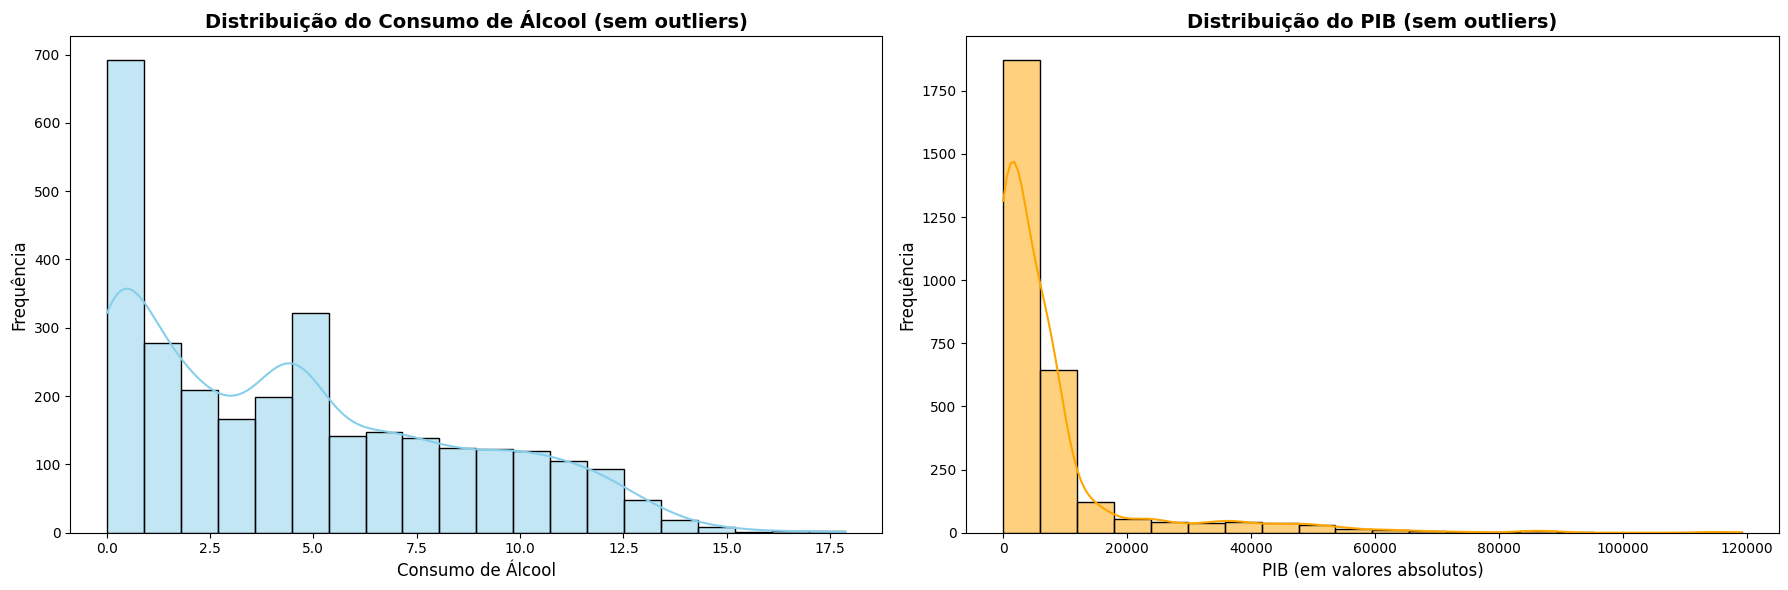

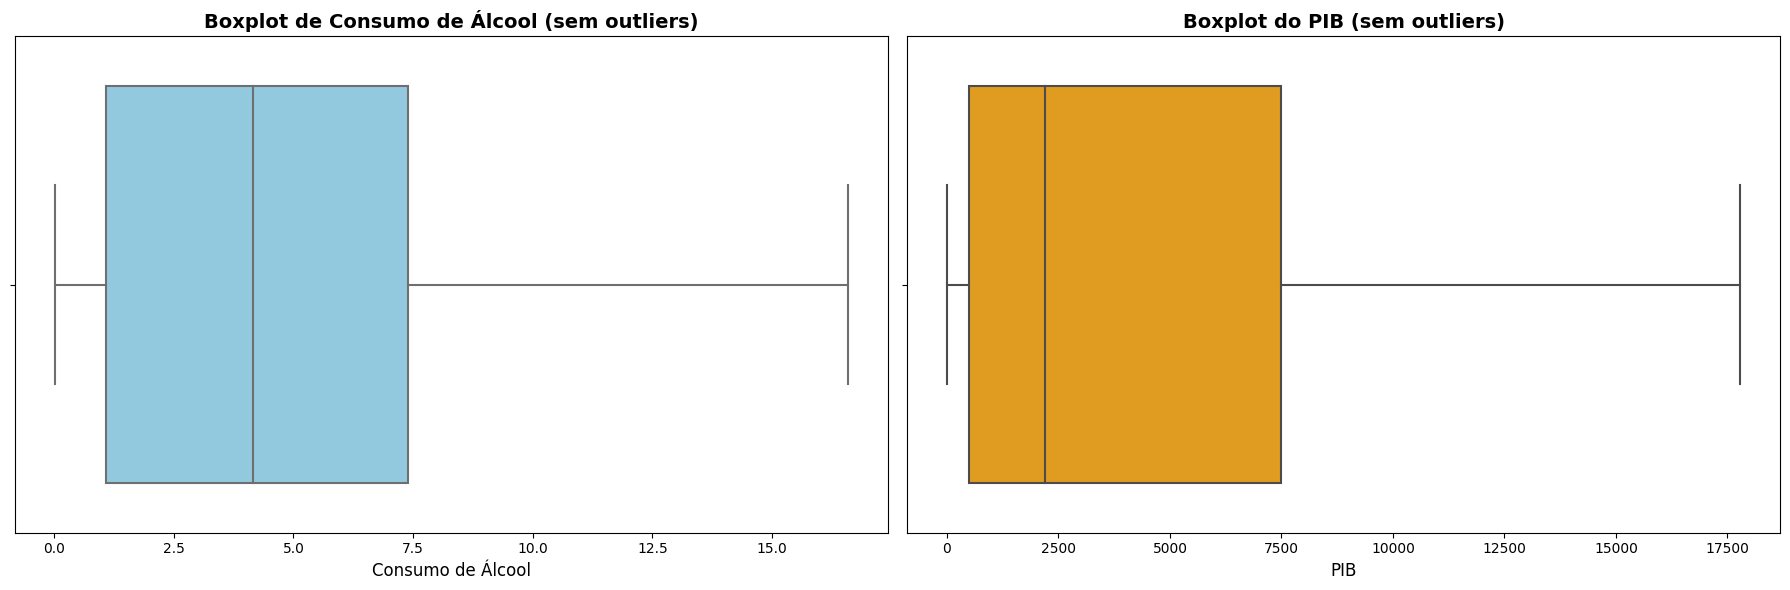

In [16]:
# Função para detectar outliers usando o intervalo interquartil (IQR)
def detectar_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    return outliers, limite_inferior, limite_superior

# Detectando outliers para PIB e Consumo de Álcool
outliers_pib, lim_inf_pib, lim_sup_pib = detectar_outliers(df, 'pib')
outliers_alcool, lim_inf_alcool, lim_sup_alcool = detectar_outliers(df, 'alcool')

# Exibindo informações sobre os outliers
print(f'Outliers no PIB: {len(outliers_pib)} encontrados')
print(f'Outliers no Consumo de Álcool: {len(outliers_alcool)} encontrados')

# Gráficos de Distribuição e Boxplot com e sem outliers
plt.figure(figsize=(18, 6))

# Subgráfico para o histograma de Consumo de Álcool sem outliers
plt.subplot(1, 2, 1)
sns.histplot(df['alcool'], kde=True, color='skyblue', bins=20)
plt.title('Distribuição do Consumo de Álcool (sem outliers)', fontsize=14, fontweight='bold')
plt.xlabel('Consumo de Álcool', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

# Subgráfico para o histograma do PIB sem outliers
plt.subplot(1, 2, 2)
sns.histplot(df['pib'], kde=True, color='orange', bins=20)
plt.title('Distribuição do PIB (sem outliers)', fontsize=14, fontweight='bold')
plt.xlabel('PIB (em valores absolutos)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

# Ajustar layout
plt.tight_layout()
plt.show()

# Removendo outliers para análise
df_sem_outliers_pib = df[df['pib'] <= lim_sup_pib]
df_sem_outliers_alcool = df[df['alcool'] <= lim_sup_alcool]

# Gráficos de Boxplot para Consumo de Álcool e PIB sem outliers
plt.figure(figsize=(18, 6))

# Boxplot para Consumo de Álcool (sem outliers)
plt.subplot(1, 2, 1)
sns.boxplot(x=df_sem_outliers_alcool['alcool'], color='skyblue')
plt.title('Boxplot de Consumo de Álcool (sem outliers)', fontsize=14, fontweight='bold')
plt.xlabel('Consumo de Álcool', fontsize=12)

# Boxplot para PIB (sem outliers)
plt.subplot(1, 2, 2)
sns.boxplot(x=df_sem_outliers_pib['pib'], color='orange')
plt.title('Boxplot do PIB (sem outliers)', fontsize=14, fontweight='bold')
plt.xlabel('PIB', fontsize=12)

# Ajustar layout
plt.tight_layout()
plt.show()

### Distribuição de Taxas de Imunização (Hepatite B, Polio, Difteria) 

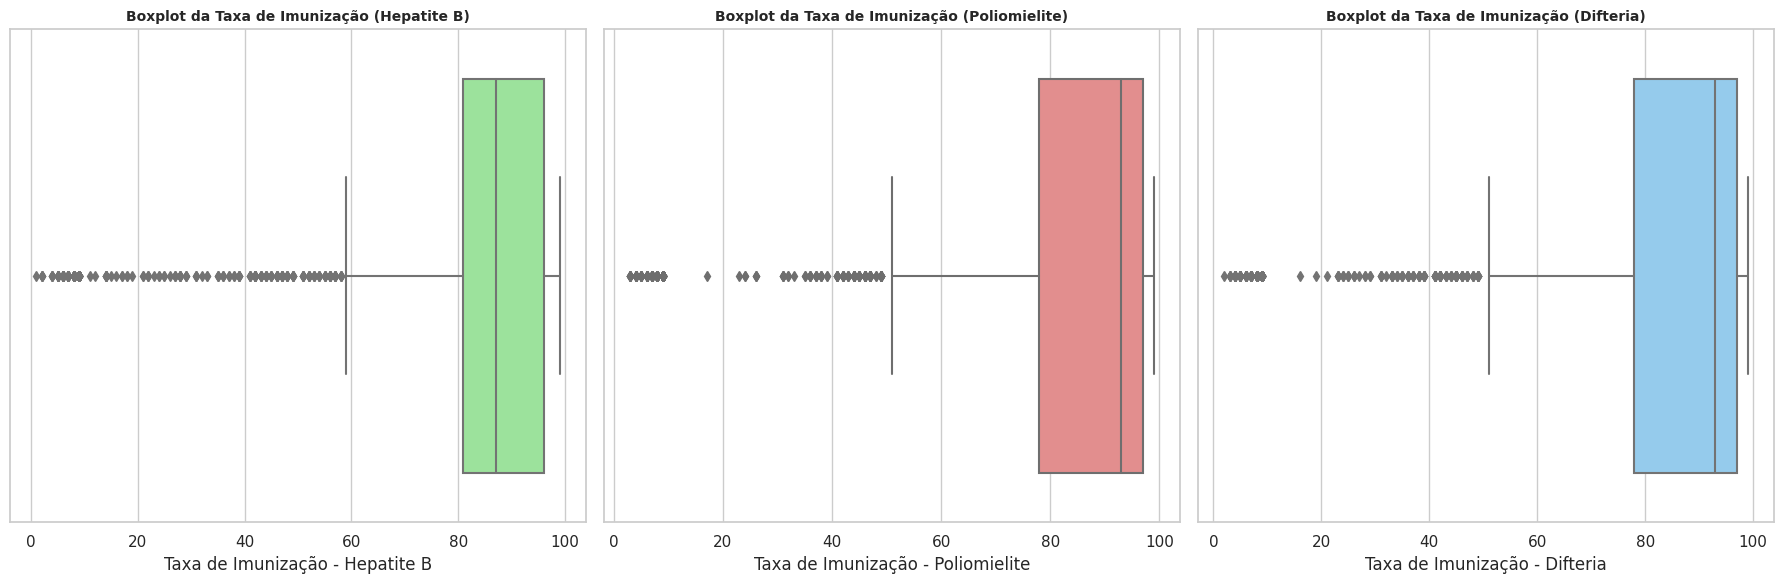

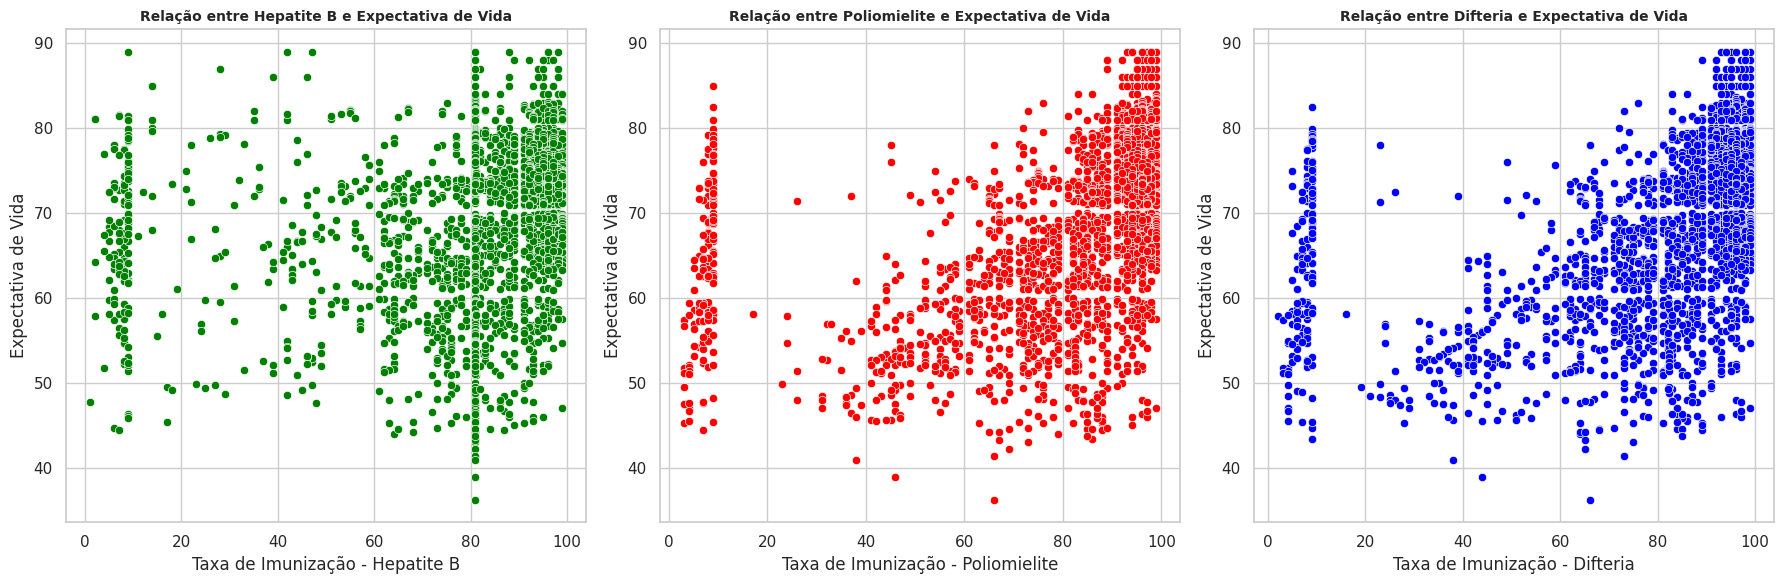

In [17]:
# Configurações para gráficos
sns.set(style="whitegrid")

# Gráficos para Distribuição das Taxas de Imunização
plt.figure(figsize=(18, 6))

# Boxplot para Hepatite B
plt.subplot(1, 3, 1)
sns.boxplot(x=df['hepatite_b'], color='lightgreen')
plt.title('Boxplot da Taxa de Imunização (Hepatite B)', fontsize=10, fontweight='bold')
plt.xlabel('Taxa de Imunização - Hepatite B', fontsize=12)

# Boxplot para Poliomielite
plt.subplot(1, 3, 2)
sns.boxplot(x=df['poliomielite'], color='lightcoral')
plt.title('Boxplot da Taxa de Imunização (Poliomielite)', fontsize=10, fontweight='bold')
plt.xlabel('Taxa de Imunização - Poliomielite', fontsize=12)

# Boxplot para Difteria
plt.subplot(1, 3, 3)
sns.boxplot(x=df['difteria'], color='lightskyblue')
plt.title('Boxplot da Taxa de Imunização (Difteria)', fontsize=10, fontweight='bold')
plt.xlabel('Taxa de Imunização - Difteria', fontsize=12)

# Ajustar layout
plt.tight_layout()
plt.show()

# Gráficos de Dispersão para a relação com a Expectativa de Vida
plt.figure(figsize=(18, 6))

# Dispersão de Hepatite B vs Expectativa de Vida
plt.subplot(1, 3, 1)
sns.scatterplot(x=df['hepatite_b'], y=df['expectativa_vida'], color='green')
plt.title('Relação entre Hepatite B e Expectativa de Vida', fontsize=10, fontweight='bold')
plt.xlabel('Taxa de Imunização - Hepatite B', fontsize=12)
plt.ylabel('Expectativa de Vida', fontsize=12)

# Dispersão de Poliomielite vs Expectativa de Vida
plt.subplot(1, 3, 2)
sns.scatterplot(x=df['poliomielite'], y=df['expectativa_vida'], color='red')
plt.title('Relação entre Poliomielite e Expectativa de Vida', fontsize=10, fontweight='bold')
plt.xlabel('Taxa de Imunização - Poliomielite', fontsize=12)
plt.ylabel('Expectativa de Vida', fontsize=12)

# Dispersão de Difteria vs Expectativa de Vida
plt.subplot(1, 3, 3)
sns.scatterplot(x=df['difteria'], y=df['expectativa_vida'], color='blue')
plt.title('Relação entre Difteria e Expectativa de Vida', fontsize=10, fontweight='bold')
plt.xlabel('Taxa de Imunização - Difteria', fontsize=12)
plt.ylabel('Expectativa de Vida', fontsize=12)

# Ajustar layout
plt.tight_layout()
plt.show()

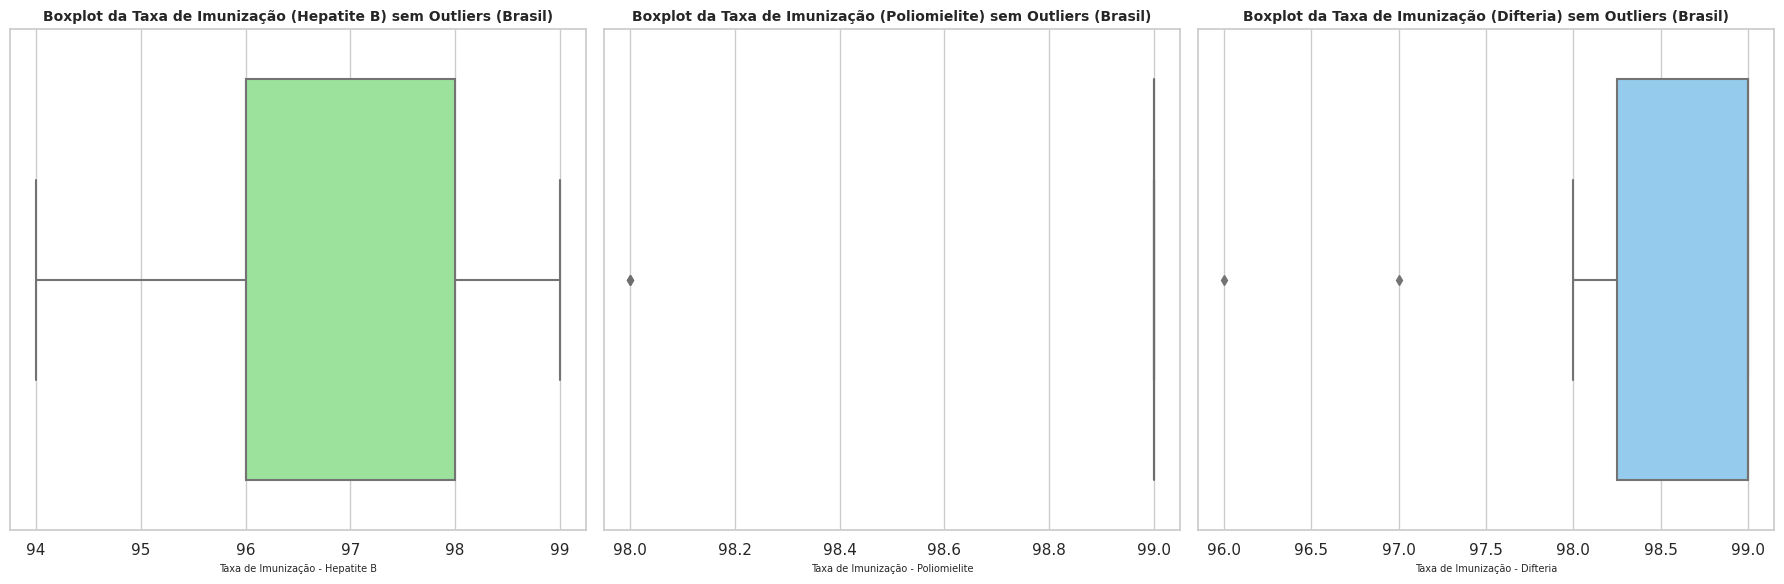

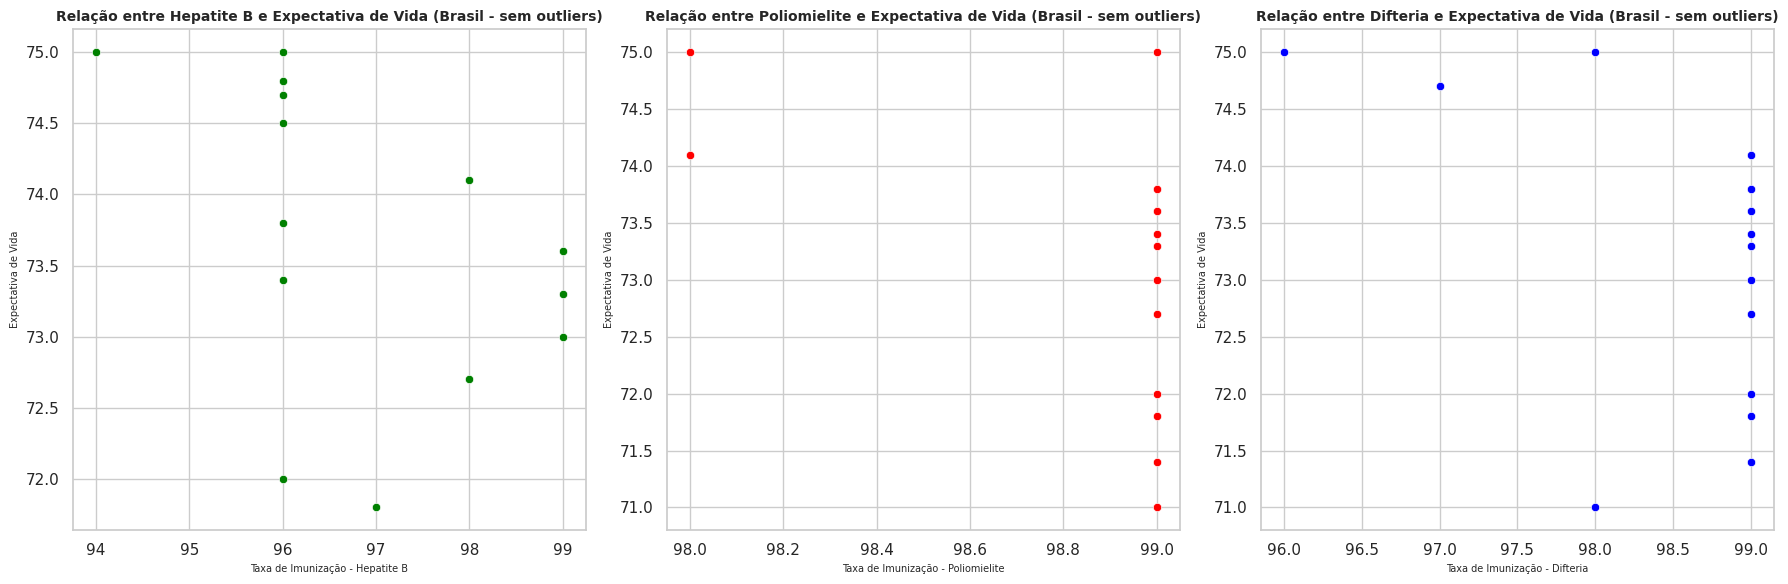

In [18]:
# Filtrar os dados para o Brasil
df_brasil = df[df['pais'] == 'Brazil']

# Função para detectar outliers usando o intervalo interquartil (IQR)
def detectar_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return limite_inferior, limite_superior

# Detectar outliers nas taxas de imunização para o Brasil
lim_inf_hepatite, lim_sup_hepatite = detectar_outliers(df_brasil, 'hepatite_b')
lim_inf_polio, lim_sup_polio = detectar_outliers(df_brasil, 'poliomielite')
lim_inf_difteria, lim_sup_difteria = detectar_outliers(df_brasil, 'difteria')

# Remover outliers para análise (apenas para visualização)
df_sem_outliers_hepatite = df_brasil[(df_brasil['hepatite_b'] >= lim_inf_hepatite) & (df_brasil['hepatite_b'] <= lim_sup_hepatite)]
df_sem_outliers_polio = df_brasil[(df_brasil['poliomielite'] >= lim_inf_polio) & (df_brasil['poliomielite'] <= lim_sup_polio)]
df_sem_outliers_difteria = df_brasil[(df_brasil['difteria'] >= lim_inf_difteria) & (df_brasil['difteria'] <= lim_sup_difteria)]

# Configurações para gráficos
sns.set(style="whitegrid")

# Gráficos para Distribuição das Taxas de Imunização sem outliers (Brasil)
plt.figure(figsize=(18, 6))

# Boxplot para Hepatite B sem outliers
plt.subplot(1, 3, 1)
sns.boxplot(x=df_sem_outliers_hepatite['hepatite_b'], color='lightgreen')
plt.title('Boxplot da Taxa de Imunização (Hepatite B) sem Outliers (Brasil)', fontsize=10, fontweight='bold')
plt.xlabel('Taxa de Imunização - Hepatite B', fontsize=7)

# Boxplot para Poliomielite sem outliers
plt.subplot(1, 3, 2)
sns.boxplot(x=df_sem_outliers_polio['poliomielite'], color='lightcoral')
plt.title('Boxplot da Taxa de Imunização (Poliomielite) sem Outliers (Brasil)', fontsize=10, fontweight='bold')
plt.xlabel('Taxa de Imunização - Poliomielite', fontsize=7)

# Boxplot para Difteria sem outliers
plt.subplot(1, 3, 3)
sns.boxplot(x=df_sem_outliers_difteria['difteria'], color='lightskyblue')
plt.title('Boxplot da Taxa de Imunização (Difteria) sem Outliers (Brasil)', fontsize=10, fontweight='bold')
plt.xlabel('Taxa de Imunização - Difteria', fontsize=7)

# Ajustar layout
plt.tight_layout()
plt.show()

# Gráficos de Dispersão para a relação com a Expectativa de Vida sem outliers (Brasil)
plt.figure(figsize=(18, 6))

# Dispersão de Hepatite B vs Expectativa de Vida
plt.subplot(1, 3, 1)
sns.scatterplot(x=df_sem_outliers_hepatite['hepatite_b'], y=df_sem_outliers_hepatite['expectativa_vida'], color='green')
plt.title('Relação entre Hepatite B e Expectativa de Vida (Brasil - sem outliers)', fontsize=10, fontweight='bold')
plt.xlabel('Taxa de Imunização - Hepatite B', fontsize=7)
plt.ylabel('Expectativa de Vida', fontsize=7)

# Dispersão de Poliomielite vs Expectativa de Vida
plt.subplot(1, 3, 2)
sns.scatterplot(x=df_sem_outliers_polio['poliomielite'], y=df_sem_outliers_polio['expectativa_vida'], color='red')
plt.title('Relação entre Poliomielite e Expectativa de Vida (Brasil - sem outliers)', fontsize=10, fontweight='bold')
plt.xlabel('Taxa de Imunização - Poliomielite', fontsize=7)
plt.ylabel('Expectativa de Vida', fontsize=7)

# Dispersão de Difteria vs Expectativa de Vida
plt.subplot(1, 3, 3)
sns.scatterplot(x=df_sem_outliers_difteria['difteria'], y=df_sem_outliers_difteria['expectativa_vida'], color='blue')
plt.title('Relação entre Difteria e Expectativa de Vida (Brasil - sem outliers)', fontsize=10, fontweight='bold')
plt.xlabel('Taxa de Imunização - Difteria', fontsize=7)
plt.ylabel('Expectativa de Vida', fontsize=7)

# Ajustar layout
plt.tight_layout()
plt.show()

### Impacto da Educação e Composição de Renda

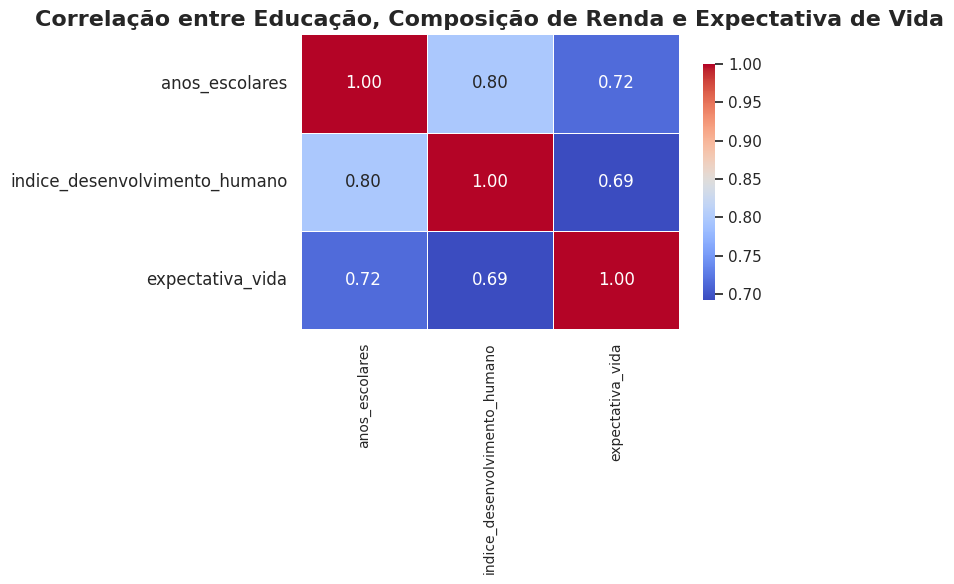

In [19]:
# Selecionar as variáveis de interesse para análise
variaveis = ['anos_escolares', 'indice_desenvolvimento_humano', 'expectativa_vida']

# Calcular a correlação entre as variáveis
correlacao = df[variaveis].corr()

# Plotando o mapa de calor da correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlação entre Educação, Composição de Renda e Expectativa de Vida', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

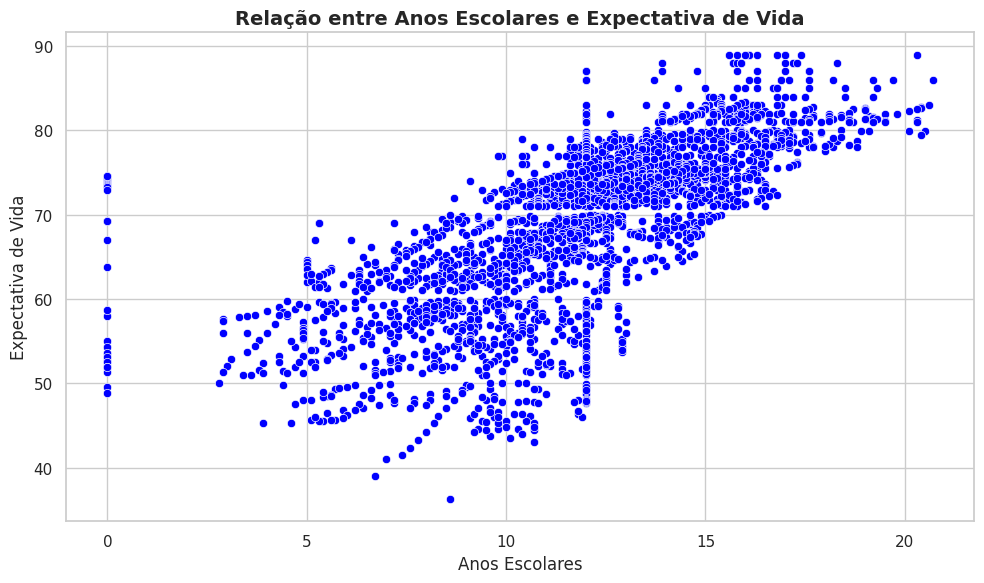

In [20]:
# Gráficos de dispersão para analisar as relações

# Dispersão de Anos Escolares vs Expectativa de Vida
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['anos_escolares'], y=df['expectativa_vida'], color='blue')
plt.title('Relação entre Anos Escolares e Expectativa de Vida', fontsize=14, fontweight='bold')
plt.xlabel('Anos Escolares', fontsize=12)
plt.ylabel('Expectativa de Vida', fontsize=12)
plt.tight_layout()
plt.show()

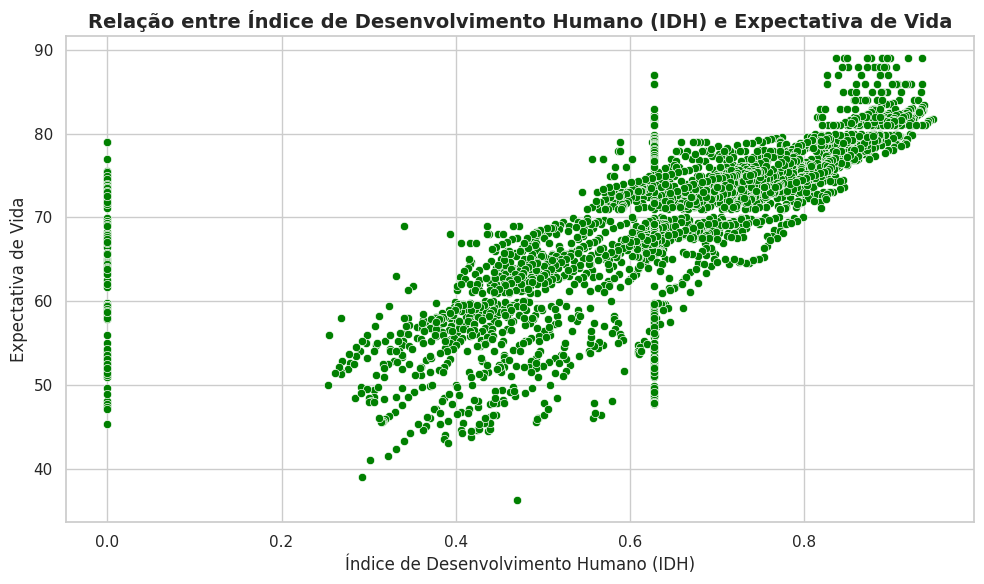

In [21]:
# Dispersão do Índice de Desenvolvimento Humano (IDH) vs Expectativa de Vida
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['indice_desenvolvimento_humano'], y=df['expectativa_vida'], color='green')
plt.title('Relação entre Índice de Desenvolvimento Humano (IDH) e Expectativa de Vida', fontsize=14, fontweight='bold')
plt.xlabel('Índice de Desenvolvimento Humano (IDH)', fontsize=12)
plt.ylabel('Expectativa de Vida', fontsize=12)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


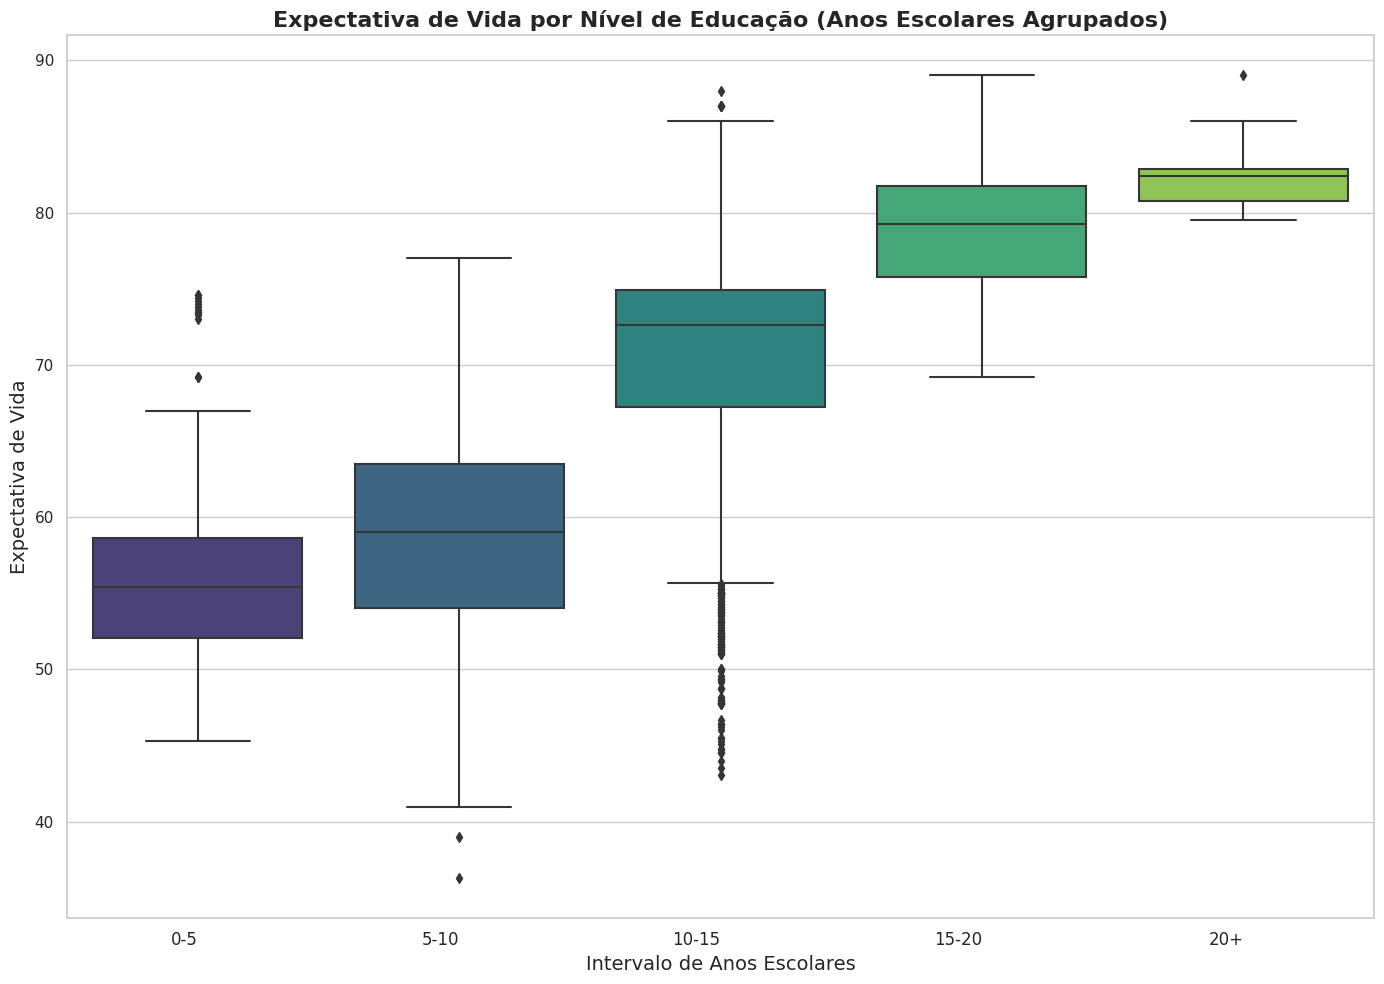

In [22]:
# Definir os intervalos de anos escolares
bins = [0, 5, 10, 15, 20, 25]  # Definindo os intervalos de anos escolares
labels = ['0-5', '5-10', '10-15', '15-20', '20+']  # Labels para cada intervalo

# Criar uma nova coluna com os intervalos
df['anos_escolares_grupo'] = pd.cut(df['anos_escolares'], bins=bins, labels=labels, right=False)

# Boxplot para comparar a Expectativa de Vida com diferentes grupos de Anos Escolares
plt.figure(figsize=(14, 10))

sns.boxplot(x=df['anos_escolares_grupo'], y=df['expectativa_vida'], palette='viridis')
plt.title('Expectativa de Vida por Nível de Educação (Anos Escolares Agrupados)', fontsize=16, fontweight='bold')
plt.xlabel('Intervalo de Anos Escolares', fontsize=14)
plt.ylabel('Expectativa de Vida', fontsize=14)

# Ajustando os rótulos do eixo X
plt.xticks(ha='right', fontsize=12)  # Ajuste de rotação e tamanho

# Ajustando o layout para evitar sobreposição
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


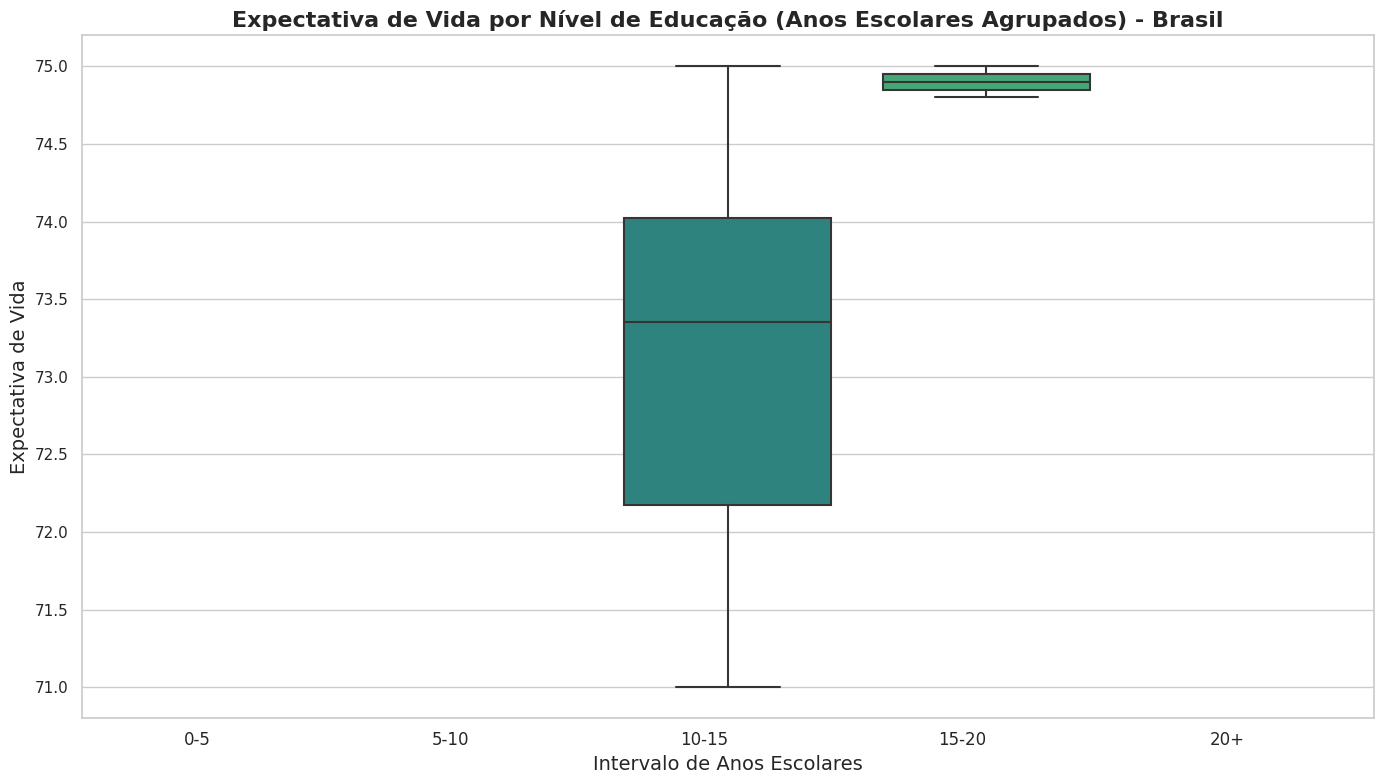

In [23]:
# Filtrar os dados para o Brasil
df_brasil = df[df['pais'] == 'Brazil']  # Substitua 'Brazil' pelo nome exato do país no seu dataframe

# Boxplot para comparar a Expectativa de Vida com diferentes grupos de Anos Escolares
plt.figure(figsize=(14, 8))

sns.boxplot(x=df_brasil['anos_escolares_grupo'], y=df_brasil['expectativa_vida'], palette='viridis')
plt.title('Expectativa de Vida por Nível de Educação (Anos Escolares Agrupados) - Brasil', fontsize=16, fontweight='bold')
plt.xlabel('Intervalo de Anos Escolares', fontsize=14)
plt.ylabel('Expectativa de Vida', fontsize=14)

# Ajustando os rótulos do eixo X
plt.xticks(ha='right', fontsize=12)  # Ajuste de rotação e tamanho

# Ajustando o layout para evitar sobreposição
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


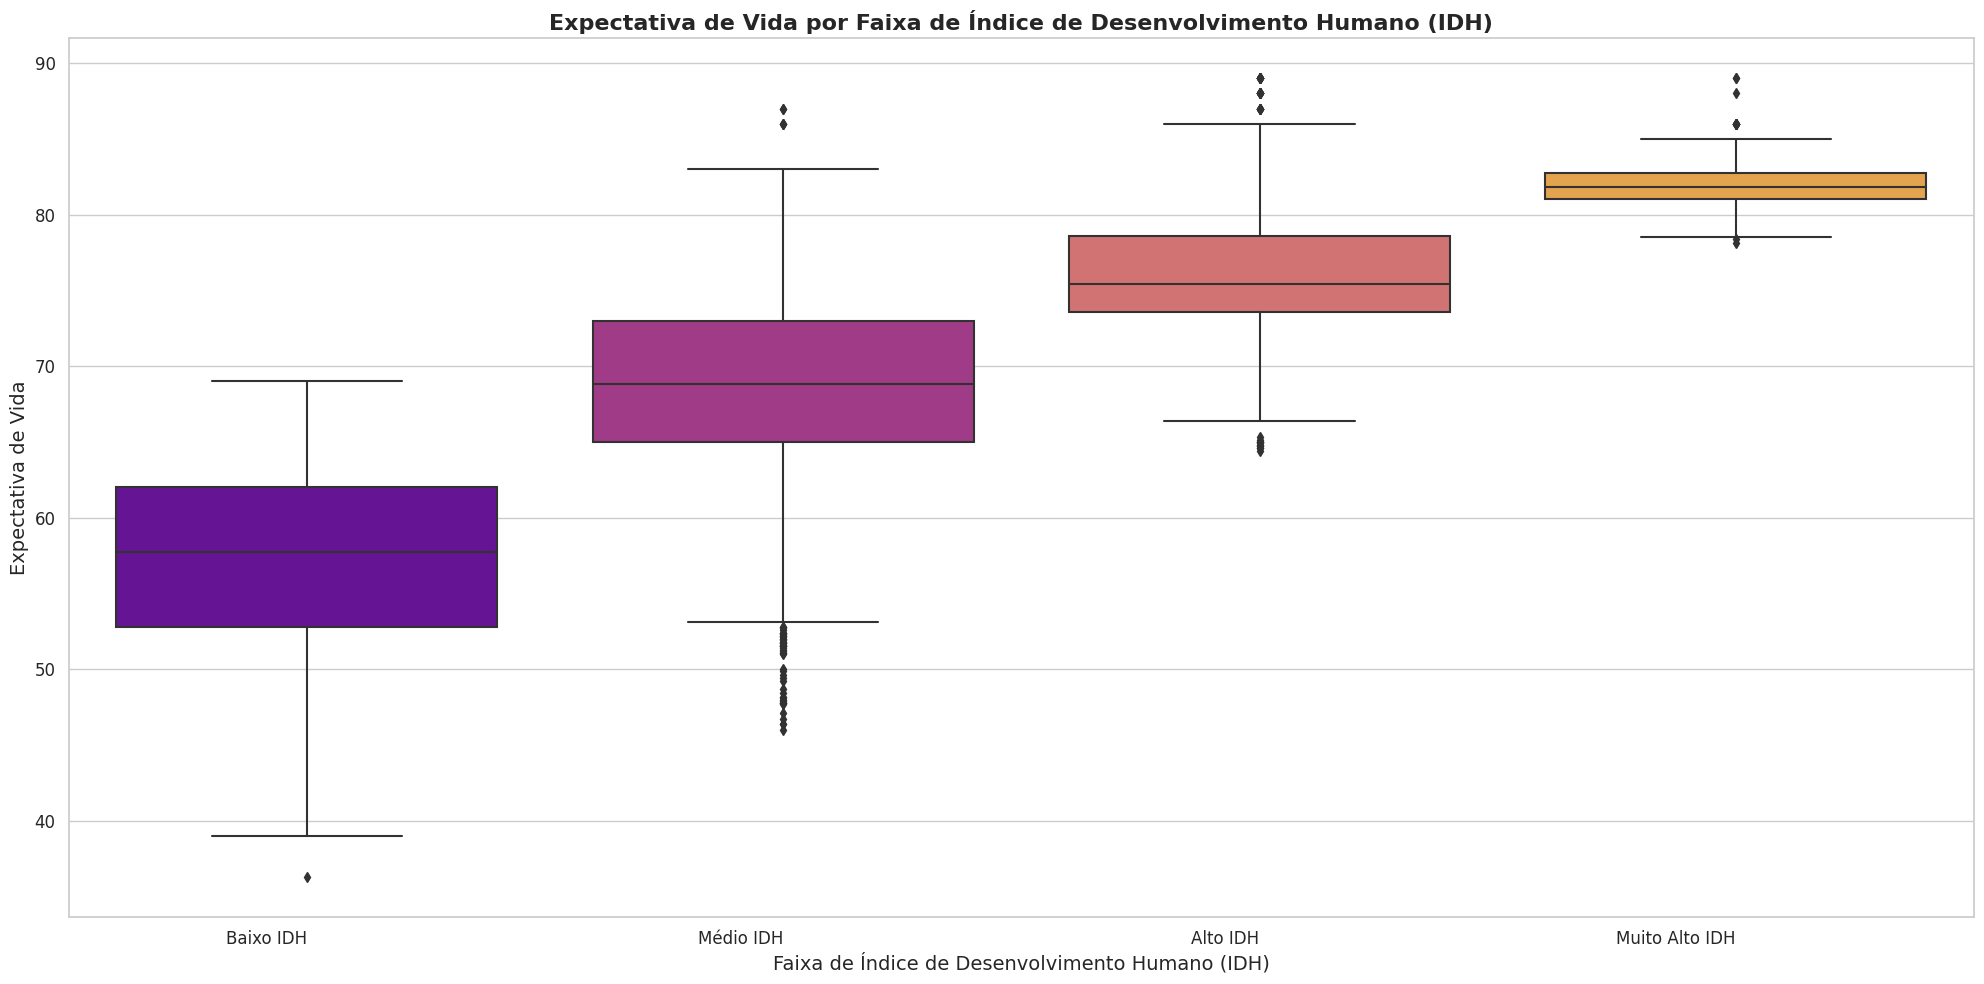

In [24]:
# Definir faixas para o Índice de Desenvolvimento Humano (IDH)
bins = [0, 0.499, 0.699, 0.899, 1.0]
labels = ['Baixo IDH', 'Médio IDH', 'Alto IDH', 'Muito Alto IDH']

# Criar uma nova coluna no DataFrame para categorizar o IDH
df['faixa_idh'] = pd.cut(df['indice_desenvolvimento_humano'], bins=bins, labels=labels)

# Plotando o boxplot com os dados agrupados por faixas de IDH
plt.figure(figsize=(20, 10))  # Aumentando o tamanho da figura para uma melhor visualização

# Criando o boxplot
sns.boxplot(x=df['faixa_idh'], y=df['expectativa_vida'], palette='plasma')

# Títulos e rótulos dos eixos
plt.title('Expectativa de Vida por Faixa de Índice de Desenvolvimento Humano (IDH)', fontsize=16, fontweight='bold')
plt.xlabel('Faixa de Índice de Desenvolvimento Humano (IDH)', fontsize=14)
plt.ylabel('Expectativa de Vida', fontsize=14)

# Ajuste dos rótulos no eixo X
plt.xticks(ha='right', fontsize=12)  # Melhorando a rotação para a leitura
plt.yticks(fontsize=12)

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()

### Correlação entre a expectativa de vida e fatores relacionados ao estilo de vida

In [25]:
# Calcular a correlação entre hábitos de vida (álcool, IMC, etc.) e expectativa de vida
correlacao_habitos = df[['alcool', 'imc', 'expectativa_vida']].corr()

# Exibir a correlação
print(correlacao_habitos)

                    alcool       imc  expectativa_vida
alcool            1.000000  0.318070          0.391598
imc               0.318070  1.000000          0.559255
expectativa_vida  0.391598  0.559255          1.000000


### Impacto da cobertura de imunização na expectativa de vida
#### As taxas de imunização (como hepatite B, poliomielite e difteria) podem ter um impacto significativo na expectativa de vida. Uma correlação positiva indicaria que maior cobertura de imunização está associada a uma maior expectativa de vida.

In [26]:
# Calcular a correlação entre as taxas de imunização e expectativa de vida
correlacao_imunizacao = df[['hepatite_b', 'poliomielite', 'difteria', 'expectativa_vida']].corr()

# Exibir a correlação
print(correlacao_imunizacao)

                  hepatite_b  poliomielite  difteria  expectativa_vida
hepatite_b          1.000000      0.408519  0.499958          0.203771
poliomielite        0.408519      1.000000  0.673553          0.461574
difteria            0.499958      0.673553  1.000000          0.475418
expectativa_vida    0.203771      0.461574  0.475418          1.000000


### O impacto da cobertura de imunização na expectativa de vida no Brasil

In [27]:
# Filtrar os dados para o Brasil
df_brasil = df[df['pais'] == 'Brazil']

# Calcular a correlação entre as taxas de imunização e expectativa de vida para o Brasil
correlacao_imunizacao_brasil = df_brasil[['hepatite_b', 'poliomielite', 'difteria', 'expectativa_vida']].corr()

# Exibir a correlação
print(correlacao_imunizacao_brasil)

                  hepatite_b  poliomielite  difteria  expectativa_vida
hepatite_b          1.000000      0.001505  0.162374          0.316340
poliomielite        0.001505      1.000000  0.843244         -0.593562
difteria            0.162374      0.843244  1.000000         -0.557059
expectativa_vida    0.316340     -0.593562 -0.557059          1.000000


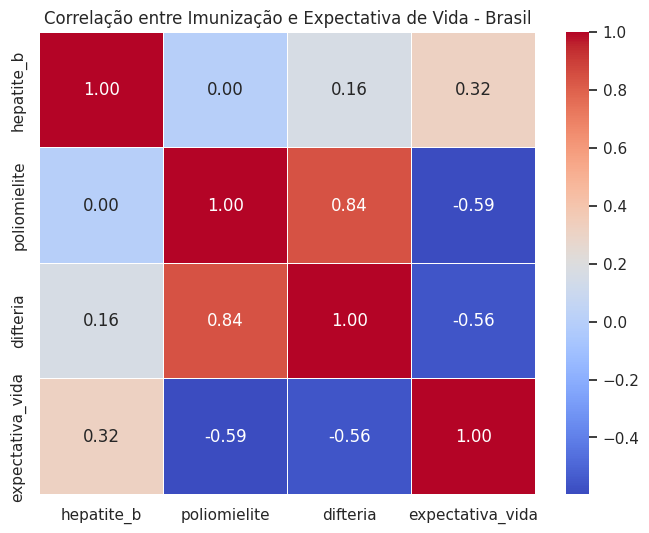

In [28]:
# Plotando o mapa de calor para as correlações
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao_imunizacao_brasil, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlação entre Imunização e Expectativa de Vida - Brasil')
plt.show()